Mounted at /content/gdrive


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


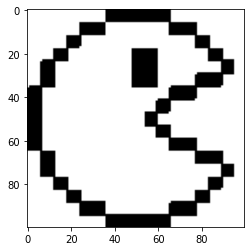

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


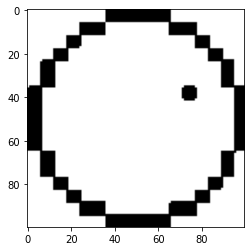

In [1]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

# Set the threshold value
threshold = 180

path = os.getcwd()
path = 'gdrive/MyDrive/Colab Notebooks'

path_train = path + '/pacman_Train.jpg'
path_test  = path + '/pacman_Test.jpg'

def read_binarize_img(path_img):
    
    # Read the image
    img_train = Image.open(path_img).convert(mode="L")
    img_train = img_train.resize(size=(100,100))
    
    # Binarize the image
    img_train_array = np.asarray(img_train,dtype=np.uint8)
    x = np.zeros(img_train_array.shape,dtype=np.float)
    x[img_train_array > threshold] = 1
    x[x==0] = -1
    
    return x


# Read images
x = read_binarize_img(path_train)
y = read_binarize_img(path_test)

# Plot images
plt.imshow(np.repeat(x[:,:,np.newaxis], repeats=3, axis=2))
plt.show()
plt.imshow(np.repeat(y[:,:,np.newaxis], repeats=3, axis=2))
plt.show()

weights are equal:
[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
size of weight matrix is:
(10000, 10000)


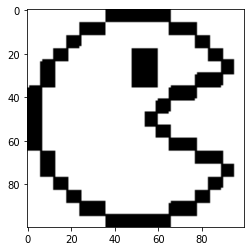

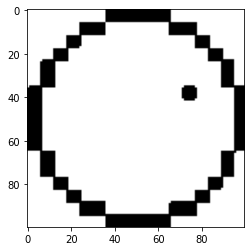

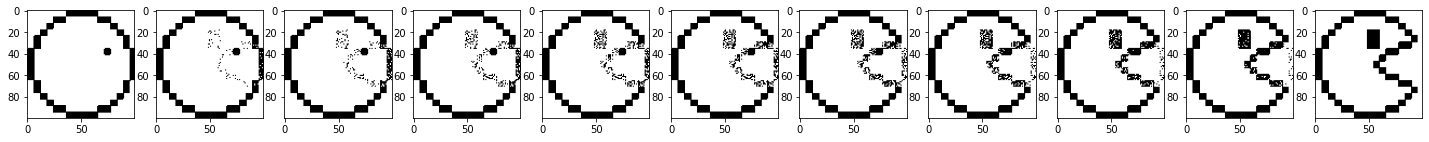

True


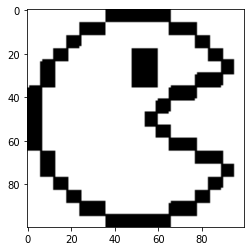

In [55]:
class DiscreteHopfieldNet:
    def __init__(self):
        self.weights = None
        self.data = None
        self.testData = None
        self.path = 'gdrive/MyDrive/Colab Notebooks'
        self.path_train = path + '/pacman_Train.jpg'
        self.path_test  = path + '/pacman_Test.jpg'

    def init_weights(self, input):
        input_ = input
        input_ = np.expand_dims(input_, 1)
        w = np.matmul(input_, input_.T)
        for i in range(input.shape[0]):
            w[i][i] = 0
        print('weights are equal:')
        print(w)
        print('size of weight matrix is:')
        print(np.shape(w))
        self.weights = w

    def activation(self, x):
        return np.where(x > 0, np.where(x <= 0, x, 1.0), -1.0)

    def predict_(self, img):
        res = np.zeros((img.shape[0]))
        random_indices = np.random.permutation(np.arange(len(img)))
        k = 0
        plt.figure(figsize = (25,2))
        for count, index in enumerate(random_indices):
            if(count%1000 == 0):
                k = k+1
                plt.subplot(1, 11, k)
                plt.imshow(img.reshape([100, 100]), cmap=plt.cm.gray)
                
            img[index] = img[index] + np.dot(img, self.weights[index])
            img[index] = self.activation(img[index])
        plt.subplot(1, 11, 11)
        plt.imshow(img.reshape([100, 100]), cmap=plt.cm.gray)
        plt.show()
        res = img
        return res

    def predict(self):
        self.data = read_binarize_img(self.path_train)
        self.init_weights(self.data.flatten())
        self.testData = read_binarize_img(self.path_test)
        self.showInputs()
        s = self.testData.reshape(-1)
        res = self.predict_(s)
        print((res == s).any())
        plt.imshow(res.reshape([100, 100]), cmap=plt.cm.gray)
        plt.show()

    def showInputs(self):
      plt.imshow(self.data, cmap=plt.cm.gray)
      plt.show()
      plt.imshow(self.testData, cmap=plt.cm.gray)
      plt.show()

if __name__ == '__main__':
    model = DiscreteHopfieldNet()
    model.predict()

weights are equal:
[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
size of weight matrix is:
(10000, 10000)


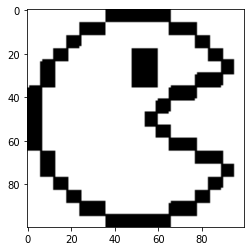

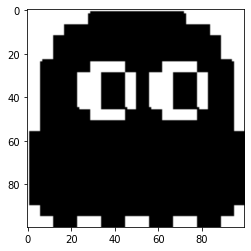

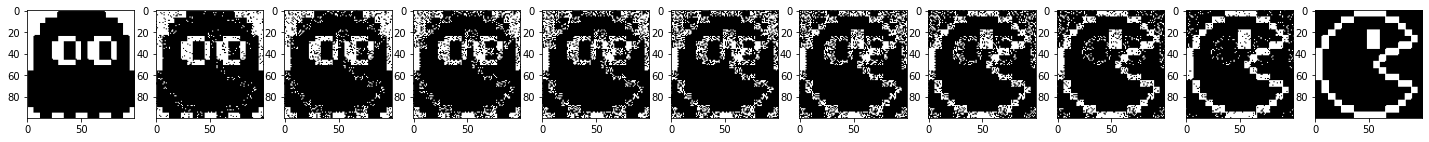

True


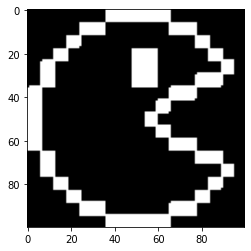

In [54]:
class DiscreteHopfieldNet:
    def __init__(self):
        self.weights = None
        self.data = None
        self.testData = None
        self.path = 'gdrive/MyDrive/Colab Notebooks'
        self.path_train = path + '/pacman_Train.jpg'
        self.path_test  = path + '/ghost.jpg'

    def init_weights(self, input):
        input_ = input
        input_ = np.expand_dims(input_, 1)
        w = np.matmul(input_, input_.T)
        for i in range(input.shape[0]):
            w[i][i] = 0
        print('weights are equal:')
        print(w)
        print('size of weight matrix is:')
        print(np.shape(w))
        self.weights = w

    def activation(self, x):
        return np.where(x > 0, np.where(x <= 0, x, 1.0), -1.0)

    def predict_(self, img):
        res = np.zeros((img.shape[0]))
        random_indices = np.random.permutation(np.arange(len(img)))
        k = 0
        plt.figure(figsize = (25,2))
        for count, index in enumerate(random_indices):
            if(count%1000 == 0):
                k = k+1
                plt.subplot(1, 11, k)
                plt.imshow(img.reshape([100, 100]), cmap=plt.cm.gray)
                
            img[index] = img[index] + np.dot(img, self.weights[index])
            img[index] = self.activation(img[index])
        plt.subplot(1, 11, 11)
        plt.imshow(img.reshape([100, 100]), cmap=plt.cm.gray)
        plt.show()
        res = img
        return res

    def predict(self):
        self.data = read_binarize_img(self.path_train)
        self.init_weights(self.data.flatten())
        self.testData = read_binarize_img(self.path_test)
        self.showInputs()
        s = self.testData.reshape(-1)
        res = self.predict_(s)
        print((res == s).any())
        plt.imshow(res.reshape([100, 100]), cmap=plt.cm.gray)
        plt.show()

    def showInputs(self):
      plt.imshow(self.data, cmap=plt.cm.gray)
      plt.show()
      plt.imshow(self.testData, cmap=plt.cm.gray)
      plt.show()

if __name__ == '__main__':
    model = DiscreteHopfieldNet()
    model.predict()